In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]

# Individual FF plots

In [3]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)

data_water_bkg = np.genfromtxt(paths.processed_data_path / '221021_BT_water_background_002' / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])        

for experiment in exp_list:
    if not experiment.startswith('.') and experiment.split('_')[1].startswith('BT'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])        
        plt.plot(data['Bath_Temp_°C'], data['FF'], color=colors[1], label=f'Exp')
        plt.plot(data_water_bkg['Bath_Temp_°C'], data_water_bkg['FF'], color=colors[0], label='WB')
        
        plt.xlabel('Bath temp [°C]')
        plt.ylabel('FF')
        
        plt.legend()
        plt.grid()
        plt.title(f'{experiment} vs Water backround')
        plt.xlim((-30, 0))
        
        plt.savefig(paths.reports_path / 'BT_individual-FF' / f'{experiment}.png')
        plt.cla()
        
plt.close()

# Agorithms comparison

In [4]:
def read_matlab_results(experiment):
    
    temp = np.genfromtxt(paths.raw_data_path / experiment / 'T_auto.csv',
             delimiter=',',
             dtype=[('temp', '<f8')])
    
    n_wells = np.genfromtxt(paths.raw_data_path / experiment / 'nFrz.csv',
              delimiter=',',
              dtype=[('n_wells', '<f8')])

    return temp['temp'], n_wells['n_wells']

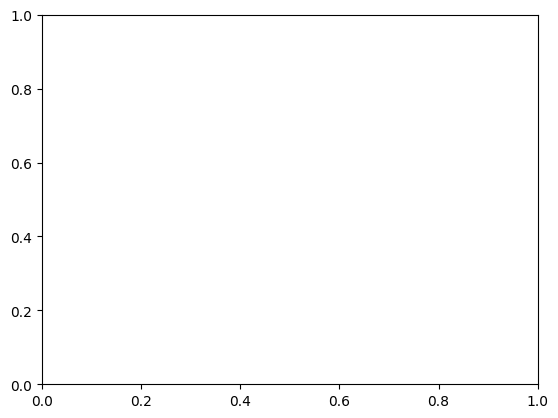

In [5]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)

for experiment in exp_list:
    if not experiment.startswith('.') and experiment.split('_')[1].startswith('BT'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])
        
        plt.plot(data['Bath_Temp_°C'], data['FF'], color=colors[2], label='Python')
        
        
        temp, n_wells = read_matlab_results(experiment)
        plt.plot(temp, n_wells/96., color=colors[4], label='Matlab')
        
        plt.xlabel('Bath temp [°C]')
        plt.ylabel('FF')
        
        plt.title(f'{experiment}')
        plt.grid()
        plt.legend()
        plt.xlim((-30, 0))
        
        plt.savefig(paths.reports_path / 'BT_algorithms-comparison-FF' / f'{experiment}.png')
        plt.cla()

# All experiments

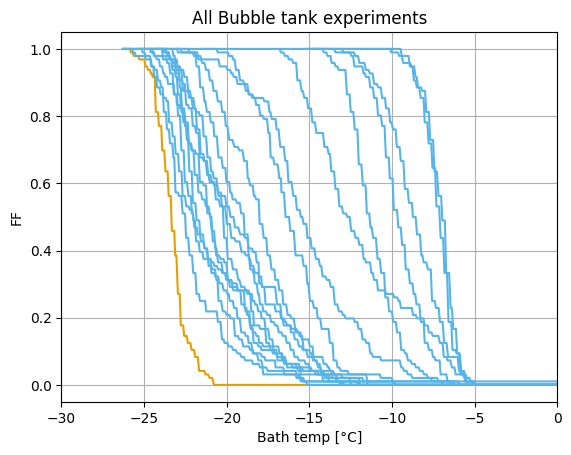

In [7]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)


for experiment in exp_list:
    if not experiment.startswith('.') and experiment.split('_')[1].startswith('BT'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                         delimiter=',',
                         skip_header=1,
                         dtype=[('date', 'datetime64[s]'),
                                ('Setpoit_Temp_°C', '<f8'),
                                ('Bath_Temp_°C', '<f8'),
                                ('FF', '<f8')])
        
        if experiment.split('_')[1].startswith('BT') and experiment != '221021_BT_water_background_002':
            plt.plot(data['Bath_Temp_°C'], data['FF'], color=colors[1], label='heated')
        elif experiment == '221021_BT_water_background_002':
            plt.plot(data['Bath_Temp_°C'], data['FF'], color=colors[0], label='background')
        

plt.grid()

plt.xlabel('Bath temp [°C]')
plt.ylabel('FF')

plt.title(f'All Bubble tank experiments')

plt.xlim((-30, 0))

plt.savefig(paths.reports_path / f'All-BT.png')